<center><img src="https://cdn-icons-png.flaticon.com/128/3669/3669986.png" width="150"/></center>

# <center>**Spotify Global Charts Analysis**</center>
<br>

# **Load libraries and dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('RdBu_r')

In [2]:
# relevant columns

rel_cols = ['title', 'rank', 'date', 'artist', 'region', 'chart', 'streams']

In [3]:
raw_data = pd.read_csv('charts.csv', parse_dates=['date'], usecols=rel_cols)

In [4]:
df = raw_data.copy()
df.head()

,title,rank,date,artist,region,chart,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,Argentina,top200,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,Argentina,top200,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,Argentina,top200,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",Argentina,top200,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,Argentina,top200,153956.0


# **EDA**

In [5]:
df.shape

(26173514, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 7 columns):
 #   Column   Dtype         
---  ------   -----         
 0   title    object        
 1   rank     int64         
 2   date     datetime64[ns]
 3   artist   object        
 4   region   object        
 5   chart    object        
 6   streams  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 1.4+ GB


## convert data types

In [7]:
df['rank'] = df['rank'].astype(np.int16)

## investigate missing data

In [8]:
df.isna().sum()

title           11
rank             0
date             0
artist          18
region           0
chart            0
streams    5851610
dtype: int64

In [9]:
# missing data in percentage

np.round(100 * df.isna().sum() / len(df), 1)

title       0.0
rank        0.0
date        0.0
artist      0.0
region      0.0
chart       0.0
streams    22.4
dtype: float64

In [10]:
df[df['streams'].isna()].nunique()

title      119381
rank           54
date         1819
artist      81123
region         70
chart           1
streams         0
dtype: int64

In [11]:
df[df['streams'].isna()]['chart'].unique()

array(['viral50'], dtype=object)

Because missing values of the other 2 columns 'title' and 'artist' are minor I drop them.<br>
Missing streaming entries only occur on chart type 'viral50'.<br>
Hence the further analysis will focus on records excluding the 'viral50'.
<br>
<br>

In [12]:
df = df[df['chart'] != 'viral50']
df.drop('chart', axis=1, inplace=True)
df.dropna(inplace=True)

In [13]:
df.isna().sum()

title      0
rank       0
date       0
artist     0
region     0
streams    0
dtype: int64

## check data integrity

In [14]:
full_data = 365 * 5 * 200
full_data # the amount of data that I expect for 5 years of daily chart results with 200 ranks

365000

In [15]:
# integrity ratio by region

region_data_volume = np.round(df['region'].value_counts() * 100 / full_data, 1)
region_data_volume

Brazil           99.9
Argentina        99.8
United States    99.8
Austria          99.7
Australia        99.2
                 ... 
Russia           27.6
Ukraine          27.6
Bulgaria         26.0
South Korea      16.3
Luxembourg        2.5
Name: region, Length: 69, dtype: float64

In [16]:
len(region_data_volume[region_data_volume >= 95]) / df['region'].nunique()

0.5797101449275363

For further analysis on region level I only consider regions with data quality of min 95%

In [17]:
complete_regions = region_data_volume[region_data_volume >= 95].index.to_list()
complete_regions

['Brazil',
 'Argentina',
 'United States',
 'Austria',
 'Australia',
 'Global',
 'Canada',
 'United Kingdom',
 'Switzerland',
 'France',
 'Philippines',
 'Ireland',
 'Indonesia',
 'Malaysia',
 'Belgium',
 'Sweden',
 'Denmark',
 'Singapore',
 'Hong Kong',
 'New Zealand',
 'Costa Rica',
 'Ecuador',
 'Italy',
 'Colombia',
 'Spain',
 'Mexico',
 'Finland',
 'Turkey',
 'Poland',
 'Taiwan',
 'Norway',
 'Chile',
 'Peru',
 'Netherlands',
 'Portugal',
 'Germany',
 'Czech Republic',
 'Japan',
 'Guatemala',
 'Uruguay']

In [18]:
len(complete_regions)

40

40 regions remain in the data for further analyses.
<br>
<br>

In [19]:
df = df[df['region'].isin(complete_regions)]

In the upcomming analyses I assume the global streaming data based on the remaining regions above the data integrity threshold.
<br>
<br>

## Data exploration for each column

In [20]:
df.columns

Index(['title', 'rank', 'date', 'artist', 'region', 'streams'], dtype='object')

### title

In [21]:
df['title'].nunique()

70579

In [22]:
df['title']

0               Chantaje (feat. Maluma)
1           Vente Pa' Ca (feat. Maluma)
2            Reggaetón Lento (Bailemos)
3                                Safari
4                           Shaky Shaky
                       ...             
25276069           Ojalá (feat. Darell)
25276070        Lo Que Pasa en la Noche
25276071                  El Equivocado
25276072              Que Fui Tu Amante
25276073                           Solo
Name: title, Length: 14352173, dtype: object

### rank

In [23]:
df['rank'].nunique()

200

In [24]:
df['rank'].min(), df['rank'].max()

(1, 200)

### date

In [25]:
df['date'].min(), df['date'].max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00'))

### artist

In [26]:
df['artist']

0                                         Shakira
1                                    Ricky Martin
2                                            CNCO
3           J Balvin, Pharrell Williams, BIA, Sky
4                                    Daddy Yankee
                            ...                  
25276069     De La Ghetto, Almighty, Bryant Myers
25276070                              Mano Arriba
25276071                              Mano Arriba
25276072                      El Gucci y Su Banda
25276073                      Amenazzy, Lary Over
Name: artist, Length: 14352173, dtype: object

In [27]:
df['artist'].nunique()

29200

The artist columns shows multiple artists seperated by comma in case of collaborations

### region

In [28]:
df['region'].nunique()

40

In [29]:
df['region'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Austria', 'Belgium',
       'Colombia', 'Denmark', 'Canada', 'Chile', 'Costa Rica',
       'Czech Republic', 'Finland', 'Ecuador', 'France', 'Germany',
       'Global', 'Guatemala', 'Hong Kong', 'Indonesia', 'Ireland',
       'Italy', 'Japan', 'Malaysia', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Singapore', 'Spain', 'Sweden', 'Taiwan',
       'Switzerland', 'Turkey', 'United Kingdom', 'United States',
       'Uruguay'], dtype=object)

### streams

In [30]:
df['streams'].describe() / 1000

count    14352.173000
mean        75.917669
std        246.330489
min          1.001000
25%          7.089000
50%         19.434000
75%         51.128000
max      19749.704000
Name: streams, dtype: float64

In [31]:
df[df['streams'] == df['streams'].max()]

,title,rank,date,artist,region,streams
22999369,Easy On Me,1,2021-10-15,Adele,Global,19749704.0


# Analysis

## whats the overall spotify development between 2017 and 2021

In [32]:
df_songs = df.copy()

df_songs = df_songs.loc[(df_songs['region'] != 'Global')]
df_songs['year'] = df_songs['date'].dt.year
df_songs['month'] = df_songs['date'].dt.month
df_songs['top10'] = df_songs['rank'] <= 10

df_songs.head()

,title,rank,date,artist,region,streams,year,month,top10
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,Argentina,253019.0,2017,1,True
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,Argentina,223988.0,2017,1,True
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,Argentina,210943.0,2017,1,True
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",Argentina,173865.0,2017,1,True
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,Argentina,153956.0,2017,1,True


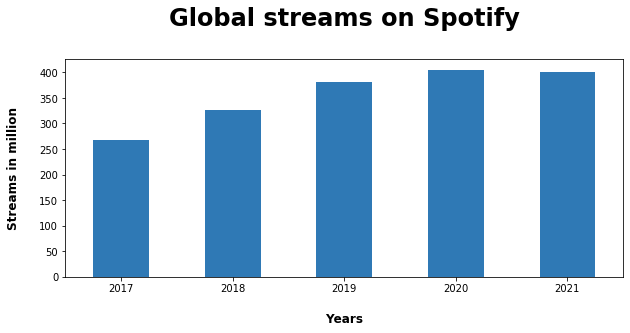

In [33]:
total_streams_dev = df_songs.groupby('year')['streams'].sum()
total_streams_dev = np.round(total_streams_dev / 1000000 / 365, 2)

plt.figure(figsize=(10,4))
total_streams_dev.plot(kind='bar')

plt.title('Global streams on Spotify\n',  fontsize=24, fontweight='bold')
plt.ylabel('Streams in million\n',  fontsize=12, fontweight='bold')
plt.xlabel('\nYears',  fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.show()

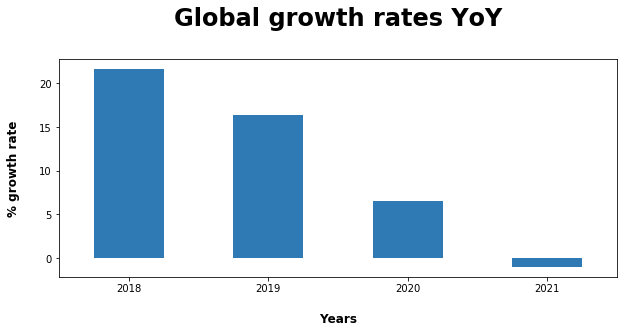

In [34]:
global_stream_growt_rates = np.round(((total_streams_dev[1:] / total_streams_dev.shift(1)[1:]) - 1) * 100, 1)

plt.figure(figsize=(10,4))
global_stream_growt_rates.plot(kind='bar')

plt.title('Global growth rates YoY\n',  fontsize=24, fontweight='bold')
plt.ylabel('% growth rate\n',  fontsize=12, fontweight='bold')
plt.xlabel('\nYears',  fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.show()

Spotify streams are continuously increasing until 2020. But the growth rates are decreasing year over year. 2021 is the first year where Spotify is facing an overall decline.
<br>
<br>

## most relevant regions

In [35]:
rel_markets = df_songs.pivot_table(index='region', columns='year', values='streams', aggfunc=np.sum)
rel_markets.sort_values(by=2017, ascending=False, inplace=True)
rel_markets.head()

year,2017,2018,2019,2020,2021
region,,,,,
United States,2.576422e+10,3.078605e+10,2.979248e+10,2.869323e+10,2.709611e+10
United Kingdom,7.031798e+09,7.700533e+09,7.756377e+09,7.357028e+09,6.563064e+09
Brazil,6.677868e+09,9.133617e+09,1.110584e+10,1.252304e+10,1.642632e+10
Mexico,6.178260e+09,7.256065e+09,9.252325e+09,1.167878e+10,1.123048e+10
Germany,5.874815e+09,7.277458e+09,9.496090e+09,9.672041e+09,7.635866e+09


In [36]:
market_shares = np.round((rel_markets / rel_markets.sum(axis=0)) * 100, 1)
market_shares.head(10)

year,2017,2018,2019,2020,2021
region,,,,,
United States,26.3,25.8,21.5,19.4,18.5
United Kingdom,7.2,6.5,5.6,5.0,4.5
Brazil,6.8,7.7,8.0,8.5,11.2
Mexico,6.3,6.1,6.7,7.9,7.7
Germany,6.0,6.1,6.8,6.5,5.2
Spain,3.7,3.9,4.1,4.4,4.5
Netherlands,3.5,3.2,3.0,2.7,2.4
Sweden,3.4,2.5,2.2,2.0,1.7
Australia,3.3,3.4,3.1,3.0,2.8


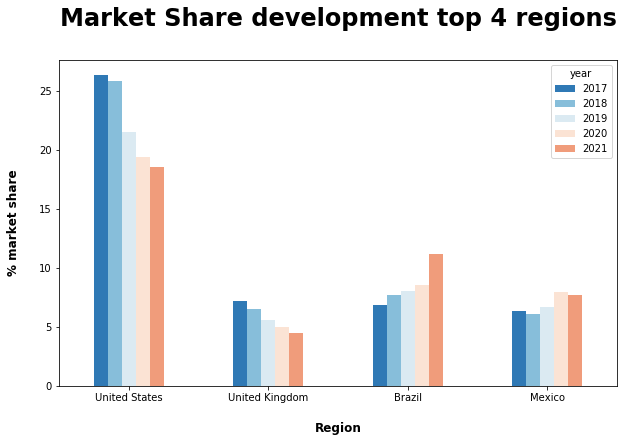

In [37]:
market_shares.head(4).plot(kind='bar', figsize=(10,6))

plt.title('Market Share development top 4 regions\n',  fontsize=24, fontweight='bold')
plt.ylabel('% market share\n',  fontsize=12, fontweight='bold')
plt.xlabel('\nRegion', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.show()

Most relevant region in 2017 was USA with incredible 26.3% share of streaming volume. But between 2017 and 2021 their market share decreases.<br> Specially Brazil, Mexico and Spain are expanding the market share.<br>
Let's double check this development by calculating year over year growth rates by region.

In [38]:
stream_growth_region = np.round(((rel_markets.iloc[:, 1:] / rel_markets.shift(periods=1, axis=1).iloc[:, 1:]) - 1) * 100, 0)
stream_growth_region.head()

year,2018,2019,2020,2021
region,,,,
United States,19.0,-3.0,-4.0,-6.0
United Kingdom,10.0,1.0,-5.0,-11.0
Brazil,37.0,22.0,13.0,31.0
Mexico,17.0,28.0,26.0,-4.0
Germany,24.0,30.0,2.0,-21.0


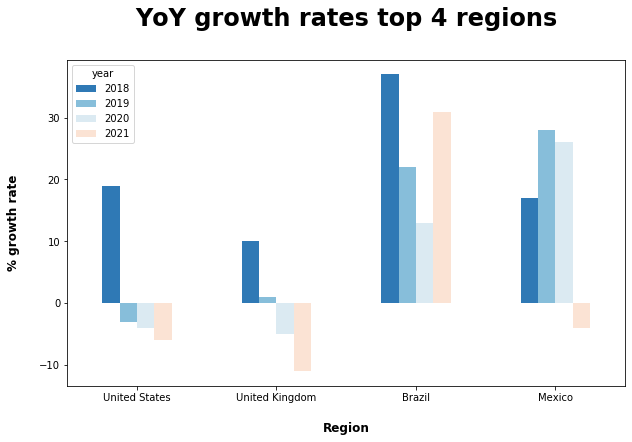

In [39]:
stream_growth_region.head(4).plot(kind='bar', figsize=(10,6))

plt.title('YoY growth rates top 4 regions\n',  fontsize=24, fontweight='bold')
plt.ylabel('% growth rate\n',  fontsize=12, fontweight='bold')
plt.xlabel('\nRegion', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.show()


Confirmed by the YoY growth rates, USA and UK are losing market share because they only show decreasing trend in streaming volume since 2019.<br>
Brazil and Mexico show incredible growth rates >30%. Brazil can even resist the overall downwards trend in 2021 in contrast to all other countries.

In [40]:
top10_regions = market_shares.head(10).index.to_list() # top 10 regions by market share
data = stream_growth_region.loc[top10_regions] # grow rates of top 10 regions

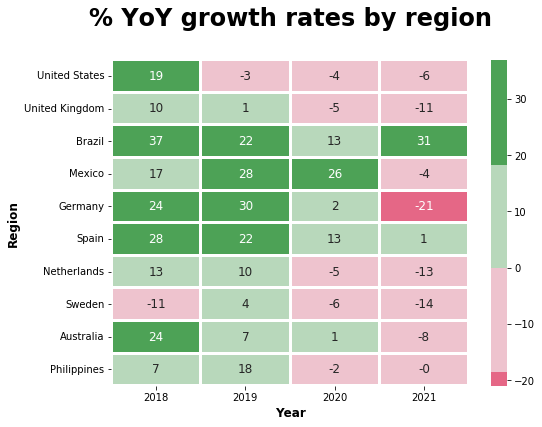

In [41]:
plt.figure(figsize=(8, 6))
cmap = sns.diverging_palette(h_neg=0, h_pos=130, s=70, l=60, n=4)

sns.heatmap(data=data, center=0, annot=True, cmap=cmap, linewidths=2, annot_kws={"size":12})

plt.title('% YoY growth rates by region\n', fontsize=24, fontweight='bold')
plt.ylabel('Region', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')

plt.show()

Among the top 10 regions, Brazil is the only one which still continoues to grow in 2021.<br> All other countries show a decline following the overall Spotify trend.<br> Germany shows the worst development in 2021 with 21% reduction.<br> Sweden seems to be the least promising market showing decreases almost every year.

## artist analysis

In [42]:
df_artist = df_songs.copy()
df_artist.head()

,title,rank,date,artist,region,streams,year,month,top10
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,Argentina,253019.0,2017,1,True
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,Argentina,223988.0,2017,1,True
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,Argentina,210943.0,2017,1,True
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",Argentina,173865.0,2017,1,True
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,Argentina,153956.0,2017,1,True


In [43]:
# to generate insights on indivual artist level, I have split the artist column due to collaborations

df_artist['artist'] = df_artist['artist'].str.split(',')

df_artist = df_artist.explode('artist', ignore_index=True)

df_artist['artist'] = df_artist['artist'].str.strip()

df_artist.head()

,title,rank,date,artist,region,streams,year,month,top10
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,Argentina,253019.0,2017,1,True
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,Argentina,223988.0,2017,1,True
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,Argentina,210943.0,2017,1,True
3,Safari,4,2017-01-01,J Balvin,Argentina,173865.0,2017,1,True
4,Safari,4,2017-01-01,Pharrell Williams,Argentina,173865.0,2017,1,True


In [44]:
def calc_kpis(df, agg):
    df_temp = df.groupby(agg, as_index=False).agg(total_streams_mio=('streams', 'sum'),
                                count_songs=('title', 'nunique'),
                                days_in_charts=('rank', 'count'),
                                days_in_top10=('top10', 'sum'),
                                #top10_share=('top10', 'mean')
                                )

    df_temp['total_streams_mio'] = np.round(df_temp['total_streams_mio'] / 1000000, 2)
    df_temp['avg_streams_per_song_mio'] = np.round (df_temp['total_streams_mio'] / df_temp['count_songs'], 1)
    df_temp['avg_days_in_charts_per_song'] = np.round (df_temp['days_in_charts'] / (df_temp['count_songs'] * len(complete_regions)), 1)
    #df_temp['top10_share'] = np.round(100 * df_temp['top10_share'], 2)
    
    df_temp.sort_values(by='total_streams_mio', inplace=True, ascending=False)

    df_temp.reset_index(drop=True, inplace=True)

    return df_temp

In [45]:
def bar_plot(data, avg, kpi, dim):

    kpi_str = kpi.replace('_', ' ').capitalize()
    dim_str = dim.replace('_', ' ').capitalize()

    plt.figure(figsize=(10,6))

    sns.barplot(data=data, x=kpi, y=dim, palette='Blues_r')
    plt.axvline(avg, lw=1, ls='--', c='r')

    plt.title(f'Ranking of {kpi_str} by {dim_str}\n',  fontsize=24, fontweight='bold')
    plt.ylabel(f'{dim_str}\n',  fontsize=12, fontweight='bold')
    plt.xlabel(f'\n{kpi_str}', fontsize=12, fontweight='bold')

    plt.text(x=avg * 1.05, y=10, s=f'The avg is\n{np.round(avg, 0)}', 
         fontsize=14, 
         fontweight='bold', 
         c='r')

    plt.show()

### most successful artists

In [46]:
artist_performance_overall = calc_kpis(df_artist, 'artist')

artist_performance_overall.head(5)

,artist,total_streams_mio,count_songs,days_in_charts,days_in_top10,avg_streams_per_song_mio,avg_days_in_charts_per_song
0,Bad Bunny,15523.01,154,307592,29915,100.8,49.9
1,Post Malone,13035.82,58,183994,14478,224.8,79.3
2,J Balvin,12801.30,151,255345,26990,84.8,42.3
3,Drake,10703.28,156,134342,9979,68.6,21.5
4,Ed Sheeran,10247.08,120,276268,21690,85.4,57.6


Measured by total streamings, "Bad Bunny" is the most successful artist with more than 15.5 billion streams between 2017 and 2021.<br>
Compared to the second artist "Post Malone" there some significant differences in their key figures. Post Malone has by far the lowest number of songs in the charts. On the other hand, he is leading in the avg streamings per song and the duration in the charts.<br> 
Also visible that the top 5 are dominated by male artists.

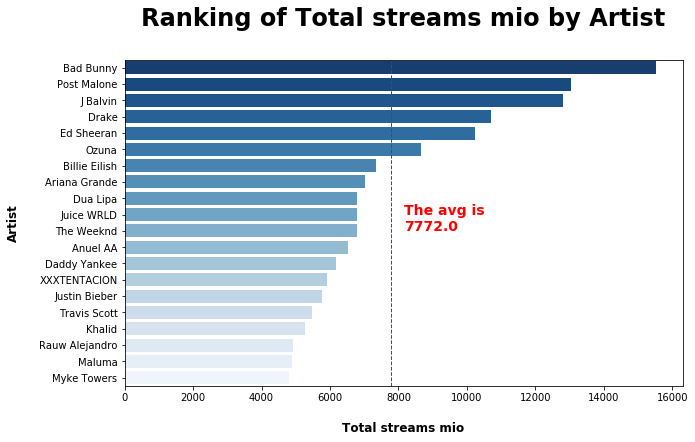

In [47]:
data = artist_performance_overall.head(20)
avg = artist_performance_overall.head(20)['total_streams_mio'].mean()

bar_plot(data, avg, 'total_streams_mio', 'artist')

plt.show()

In [48]:
top_artist = artist_performance_overall['artist'].iloc[0]
top_artist

'Bad Bunny'

### most successful songs of best artist

In [49]:
top_artist_songs = df_artist[df_artist['artist'] == top_artist]
top_artists_song_performance = calc_kpis(top_artist_songs, 'title')

top_artists_song_performance.head()

,title,total_streams_mio,count_songs,days_in_charts,days_in_top10,avg_streams_per_song_mio,avg_days_in_charts_per_song
0,DÁKITI,998.32,1,7097,2418,998.3,177.4
1,I Like It,798.26,1,13117,560,798.3,327.9
2,Callaita,645.51,1,8613,1721,645.5,215.3
3,MIA (feat. Drake),617.11,1,9018,1578,617.1,225.4
4,No Me Conoce - Remix,597.00,1,8861,1707,597.0,221.5


"DAKITI" is the most successful song from "Bad Bunny".

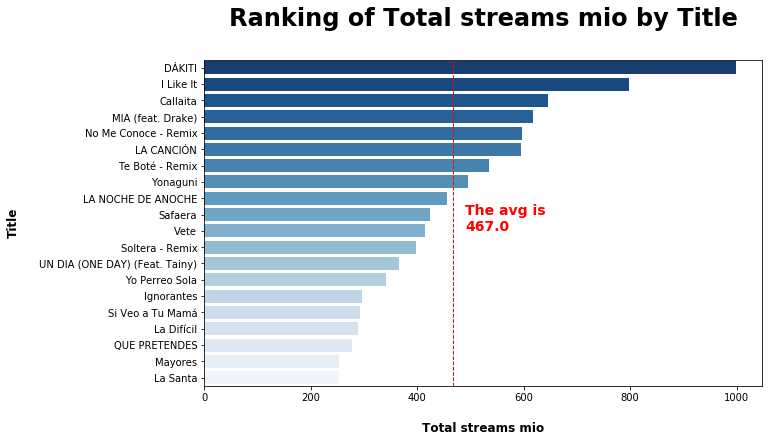

In [50]:
data = top_artists_song_performance.head(20)
avg = top_artists_song_performance.head(20)['total_streams_mio'].mean()

bar_plot(data, avg, 'total_streams_mio', 'title')

plt.show()

### annual development of best artist

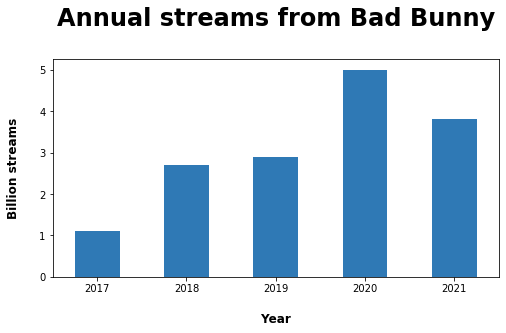

In [51]:
plt.figure(figsize=(8,4))

np.round (top_artist_songs.groupby('year')['streams'].sum() / 1000000000, 1).plot(kind='bar')

plt.title(f'Annual streams from {top_artist}\n',  fontsize=24, fontweight='bold')
plt.ylabel('Billion streams\n',  fontsize=12, fontweight='bold')
plt.xlabel('\nYear', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.show()

In [52]:
top_artists_year_performance = calc_kpis(top_artist_songs, 'year')

top_artists_year_performance.sort_values('year')

,year,total_streams_mio,count_songs,days_in_charts,days_in_top10,avg_streams_per_song_mio,avg_days_in_charts_per_song
4,2017,1120.83,39,46283,2757,28.7,29.7
3,2018,2719.59,64,62838,5331,42.5,24.5
2,2019,2889.83,55,49857,7670,52.5,22.7
0,2020,4984.89,72,79326,7176,69.2,27.5
1,2021,3807.86,51,69288,6981,74.7,34.0


Bad Bunny's most succesful year was 2020 with almost 5 billion streams. He had 72 songs in the top 200 and achieved 69 million streams for every song.

### region performance of best artist

In [53]:
artists_region_performance = df_artist.groupby(['region', 'artist'], as_index=False)['streams'].sum()
artists_region_performance['streams'] = np.round (artists_region_performance['streams'] / 1000000, 1)

artists_region_performance['artist_rank'] = artists_region_performance.groupby(['region'])['streams'].rank(method='dense', ascending=False)
artists_region_performance['artist_rank'] = artists_region_performance['artist_rank'].astype(np.int16)

artists_region_performance.head()

,region,artist,streams,artist_rank
0,Argentina,#TocoParaVos,6.0,338
1,Argentina,0-600,0.3,395
2,Argentina,18 Kilates,0.1,397
3,Argentina,2 Chainz,0.0,398
4,Argentina,21 Savage,5.5,343


In [54]:
top_artist_region_performance = artists_region_performance[artists_region_performance['artist'] == top_artist].sort_values(by='streams', ascending=False)
top_artist_region_performance['stream_share'] = np.round (100 * top_artist_region_performance['streams'] / top_artist_region_performance['streams'].sum(), 1)
top_artist_region_performance['stream_share_running'] = top_artist_region_performance['stream_share'].cumsum()

top_artist_region_performance.head(20)

,region,artist,streams,artist_rank,stream_share,stream_share_running
34475,Mexico,Bad Bunny,4755.7,1,30.6,30.6
9913,Chile,Bad Bunny,2384.6,1,15.4,46.0
48512,Spain,Bad Bunny,1989.3,1,12.8,58.8
61012,United States,Bad Bunny,1871.6,15,12.1,70.9
106,Argentina,Bad Bunny,1322.8,1,8.5,79.4
41372,Peru,Bad Bunny,802.7,1,5.2,84.6
11200,Colombia,Bad Bunny,647.0,2,4.2,88.8
17015,Ecuador,Bad Bunny,335.2,1,2.2,91.0
24220,Guatemala,Bad Bunny,303.6,1,2.0,93.0
12272,Costa Rica,Bad Bunny,234.2,1,1.5,94.5


"Bad Bunny" generates most of his streams in America specially South America (~95% up to Costa Rica). Mexico is the largest market  covering ~30% of his total streams. The artist rank shows that he is the most streamed artist in South America except Colombia.

## song analysis

### most successful song

Lets figure out if Bad Bunny's most streamed song "DAKITI" is also the most succesful overall

In [55]:
top_artist_best_song = top_artists_song_performance['title'][0]
top_artist_best_song

'DÁKITI'

In [56]:
song_performance_overall = calc_kpis(df_songs, 'title')

top20_songs = song_performance_overall.head(20)
top20_songs

,title,total_streams_mio,count_songs,days_in_charts,days_in_top10,avg_streams_per_song_mio,avg_days_in_charts_per_song
0,Blinding Lights,2380.64,1,27679,5651,2380.6,692.0
1,Shape of You,2247.41,1,45618,7912,2247.4,1140.4
2,Dance Monkey,2070.16,1,27309,5936,2070.2,682.7
3,Someone You Loved,1794.87,1,31609,3106,1794.9,790.2
4,Sunflower - Spider-Man: Into the Spider-Verse,1655.17,1,23193,2048,1655.2,579.8
5,bad guy,1498.95,1,24144,2859,1499.0,603.6
6,Señorita,1486.59,1,22728,4004,1486.6,568.2
7,Don't Start Now,1471.26,1,24164,2466,1471.3,604.1
8,Lucid Dreams,1419.87,1,21935,758,1419.9,548.4
9,Happier,1366.37,1,34256,1674,1366.4,856.4


The most streamed song globally is "Blinding Lights" by the Weeknd with 2.38 billion streams. "DAKITI" does not belong to the top 20 most streamed songs.

In [57]:
song_performance_overall[song_performance_overall['title'] == top_artist_best_song]

,title,total_streams_mio,count_songs,days_in_charts,days_in_top10,avg_streams_per_song_mio,avg_days_in_charts_per_song
29,DÁKITI,998.32,1,7097,2418,998.3,177.4


"DAKITI" is on the 29th rank.

In [58]:
artist_performance_overall[artist_performance_overall['artist'] == 'The Weeknd']

,artist,total_streams_mio,count_songs,days_in_charts,days_in_top10,avg_streams_per_song_mio,avg_days_in_charts_per_song
10,The Weeknd,6792.79,70,112041,9563,97.0,40.0


"The Weeknd" is the 10th most streamed artist with 6.8 billion streams

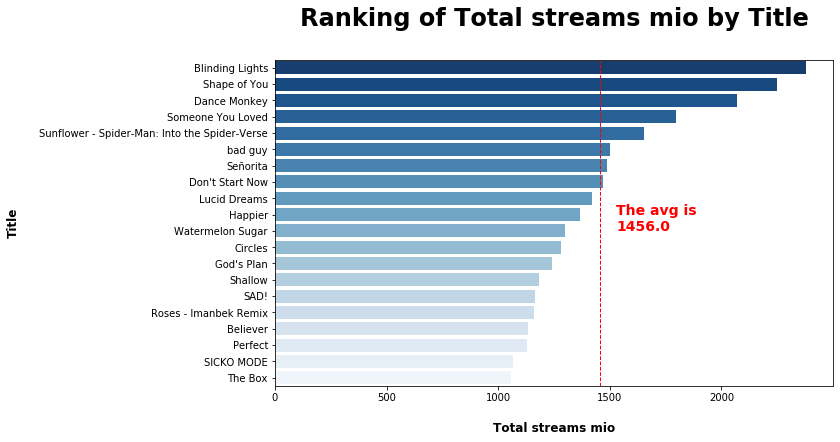

In [59]:
data = top20_songs.sort_values(by='total_streams_mio', ascending=False)
avg = top20_songs['total_streams_mio'].mean()

bar_plot(data, avg, 'total_streams_mio', 'title')

In [60]:
best_song = top20_songs['title'][0]
best_song

'Blinding Lights'

### avg rank by region of best song

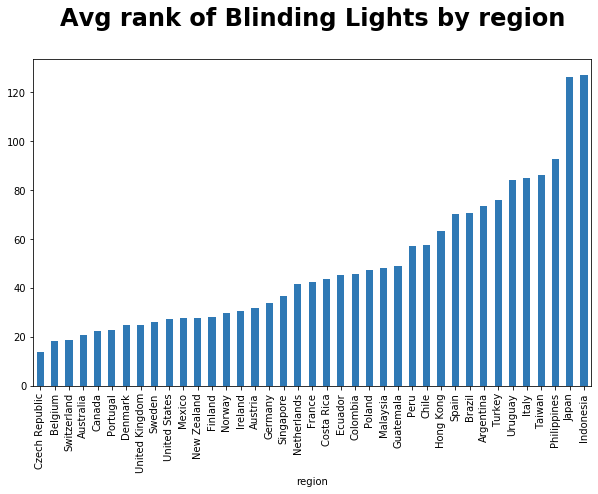

In [61]:
best_song_region = df_artist[df_artist['title'] == best_song].groupby('region')['rank'].mean().sort_values()

plt.figure(figsize=(10,6))

best_song_region.plot(kind='bar')
plt.title(f'Avg rank of {best_song} by region\n', fontsize=24, fontweight='bold')

plt.show()

In [62]:
best_song_country = best_song_region.index[0]
best_song_country

'Czech Republic'

In [63]:
f'{best_song} is performing best in {best_song_country} with an avg rank of {np.round(best_song_region[0], 1)}.'

'Blinding Lights is performing best in Czech Republic with an avg rank of 13.9.'

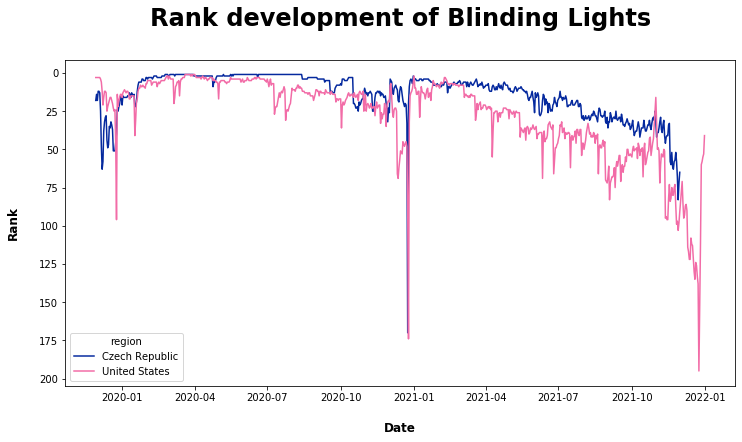

In [64]:
countries = [best_song_country, 'United States']

data = df_songs[(df_songs['title'] == best_song) & (df_songs['region'].isin(countries))]

plt.figure(figsize=(12,6))

sns.lineplot(data=data, x='date', y='rank', hue='region', palette=['#05299E', '#F26CA7'])

plt.title(f'Rank development of {best_song}\n',  fontsize=24, fontweight='bold')
plt.ylabel('Rank\n',  fontsize=12, fontweight='bold')
plt.xlabel(f'\nDate', fontsize=12, fontweight='bold')

plt.gca().invert_yaxis()

plt.show()

In [65]:
# duration Blinding Lights stayed in the charts in Czech Republic (in days) 

data[data['region'] == best_song_country]['date'].nunique()

732

In [66]:
print(f'The ranking timeseries of {best_song} confirms the oustanding avg rank in {countries[0]}.\nThe development shows most of the time the ranking in {countries[0]} is above {countries[1]}.') 

The ranking timeseries of Blinding Lights confirms the oustanding avg rank in Czech Republic.
The development shows most of the time the ranking in Czech Republic is above United States.


# Key insights

***Overall / Regions***
- Spotify's streaming volume is growing but slower year over year and 2021 is the first decline
- by far biggest market (market share by streaming volume) are the USA. But their share is decreasing, whereas Brazil and Mexico are growing

***Artist***
- The most streamed artist globally is "Bad Bunny" with 15,5 billion streams
- His most successful song is "DAKITI"
- Although "Bad Bunny" is the most streamed artist, he generates ~95% of his streams in America (North + South)
- 2020 was the most successful year for "Bad Bunny"

***Song***
- The most streamed song globally is "Blinding Lights" by "The Weeknd"
- "DAKITI" achieves only the 29th place in global song ranking
- "Blinding Lights" achieves the best avg ranking in Czech Republic with ~14 and stayed for 732 days in the charts